# Работа со словарем

In [38]:
from bs4 import BeautifulSoup as bs
import re
import pandas as pd

In [39]:
input_file = 'bagv_dict.html'
dict_beginning = 521
dict_ending = 8265

language = 'Bagvalal'
glottolog = 'bagv1239'
reference = 'Magomedova 2004' 
contributor = 'A. Davidenko'

romanic = ['I', 'II', 'III']

header_list = ['id', 'language', 'glottolog', 'reference',
               'lemma_source', 'ending', 'pos', 'borrowing', 'dialect',
               'translation_ru', 'contributor', 'source']

dialect_list = ['(гим.)', '(кван.)', '(тлиб.)', '(тлис.)', '(тлон.)', 
                '(гим)', '(кван)', '(тлиб)', '(тлис)', '(тлон)', '(кван., гим.)']


In [40]:
def preprocessing(text):
    text = text.replace('<sup>Н</sup>', 'ᴴ')
    text = text.replace('<sup>н</sup>', 'ᴴ')
    text = text.replace('<sup>1</sup>', '¹')
    text = text.replace('<sup>2</sup>', '²')
    text = text.replace('<sup>2</sup>', '³')
    return text

In [41]:
def replacing(text):
    text = text.replace('//²', '//́Э')
    text = text.replace(': ²', ':́Э')
    text = text.replace('/ ²', '/́Э')
    if text[0] == '²':
        text = '́Э' + text[1:]
    if text[len(text)-1] == 'I':
        text = text[:1]  
    text = text.replace('ᴴ', 'ᴴ')
    text = text.replace('\xad', '')
    text = text.replace('3', '³')
    text = text.replace('\n', ' ')
    text = text.replace("P", "́И")
    text = text.replace('æ', '̄З')
    text = text.replace('È', "É")
    text = text.replace('E', 'Е')
    text = text.replace('A', '̄С')
    text = text.replace('Á̄I', '̄́А̄Л̄Ъ')
    text = text.replace('ÁI', '́А̄Л̄Ъ')
    text = text.replace('АI', 'А̄Л̄Ъ')
    text = text.replace('ЕÁ', '̄Л́А')
    text = text.replace('ЕÊ', '̄Л̄́А')
    text = text.replace('ЕА', 'Л̄А')
    text = text.replace('И´I', '́И ̄Л̄Ъ')
    text = text.replace('ᴴI', 'ᴴ̄Л̄Ъ')
    text = text.replace('Ą', '̄Р')
    text = text.replace('Ā', 'Ā')
    text = text.replace('À', 'Á')
    text = text.replace('ä', '̄Б')
    text = text.replace('Ê', 'Á̄')
    text = text.replace('X', '̄И')
    text = text.replace('R', '́И')
    text = text.replace('Ç', '̄́О')
    text = text.replace('N', 'X̄')
    text = text.replace('Ð', '̄С̄I')
    text = text.replace('Æ', 'Ē')
    text = text.replace('∙', '́У')
    text = text.replace('Z', 'Ӯ')
    text = text.replace('ã', '̄М')
    text = text.replace('ç', '̄Д')
    text = text.replace('V', '̄Ч')
    text = text.replace('Ë', '̄́Е')
    text = text.replace('J', '̄Ч̄I')
    text = text.replace('ć', "̄К̄I")
    text = text.replace('Í', '̄́И')
    text = text.replace("å", "̄Н")
    text = text.replace("ð", "̄К̄Ъ")
    text = text.replace("C", "̄К")
    text = text.replace("Ò", "́О")
    text = text.replace("Ē", "̄́Е")
    text = text.replace("M", "̄Ц̄I")
    text = text.replace("μ", "́У")
    text = text.replace("Î", "̄́У")
    text = text.replace("ċ", "̄Т̄I")
    text = text.replace("ЕЕ", "̄ЛЕ")
    text = text.replace("Нᴴ", "ᴴ")
    text = text.replace(' /', '/')
    text = text.replace('/ ', '/')
    text = text.replace(' :', ':')
    text = text.replace(': ', ':')
    text = text.replace(' )', ')')
    text = text.replace('( ', '(')
    text = text.replace(' -', '-')
    text = text.replace('- ', '-')
    text = text.replace('-', '–')
    text = text.replace('1', '')
    text = text.replace('2', '')
    text = text.replace('III', '')
    text = text.replace('II', '')
    text = text.replace('~', '')
    return text

In [42]:
def not_lemma_replacing(text):
    text = text.replace('B', 'с̄')
    text = text.replace('S', 'ӣ')
    text = text.replace('F', 'л̄')
    text = text.replace('†', '́а̄')    
    text = text.replace('Н', 'л̄ъ̄')
    text = text.replace('Þ', 'н̄')
    text = text.replace('}', 'е́̄')
    text = text.replace('Y', 'ӣ')
    text = text.replace('[', 'ӯ')
    text = text.replace('ô', 'с̄Ī')
    return(text)

In [43]:
def ipaing(text):
    text = text.replace("X̄", "-χː")
    text = text.replace("̄Ц̄I", "-t͡sː'")
    
    text = text.replace("Āᴴ", "-ãː")
    text = text.replace("Áᴴ", "-ã'")
    text = text.replace("Аᴴ", "-ã")
    text = text.replace("Á̄", "-aː'")
    text = text.replace('̄́А', "-aː'")
    text = text.replace("Á", "-a'")
    text = text.replace("́А", "-a'")
    text = text.replace("Á", "-a'")
    text = text.replace("Ā", "-aː")
    text = text.replace("̄А", "-aː")
    text = text.replace("А", "-a")
    
    text = text.replace('̄Б', "-bː")
    text = text.replace("Б", "-b")
    
    text = text.replace("В", "-w")
    
    text = text.replace("ГЬ", "-h")
    text = text.replace("ГЪ", "-ʁ")
    text = text.replace("ГI", "-ʕ")    
    text = text.replace("Г’", "-ɡʲ")
    text = text.replace("Г", "-ɡ")
    
    text = text.replace("ДЖ", "-d͡ʒ")
    text = text.replace('̄Д', "-dː")
    text = text.replace("Д", "-d")
    
    text = text.replace("Ēᴴ", "-ẽː")
    text = text.replace("Éᴴ", "-ẽ'")
    text = text.replace("́Еᴴ", "-ẽ'")
    text = text.replace("Еᴴ", "-ẽ")
    text = text.replace("̄́Е", "-eː'")
    text = text.replace("É", "-e'")
    text = text.replace("Ē", "-eː")
    text = text.replace("Ē", "-eː")
    text = text.replace("Ē", "-eː")
    text = text.replace("̄Е", "-eː")
    text = text.replace("Е", "-e")
    
    text = text.replace("Ж", "-ʒ")
    
    text = text.replace('̄З', "-zː")
    text = text.replace("З", "-z")
    
    text = text.replace('Иᴴ', "-ĩ")
    text = text.replace("̄́И", "-iː'")
    text = text.replace("̄И", "-iː")
    text = text.replace("́И", "-i'")
    text = text.replace("И", "-i")
    
    text = text.replace("Й", "-j")
    
    text = text.replace("К’", "-kʲ")
    text = text.replace("КI’", "-kʲ'")
    text = text.replace("КЬ", "-t͡ɬ'")
    text = text.replace("̄К̄Ъ", "-q͡χː'")
    text = text.replace("КЪ", "-q͡χ'")
    text = text.replace("̄К̄I", "-kː'")
    text = text.replace("КI", "-k'")
    text = text.replace("̄К", "-kː")
    text = text.replace("К", "-k")
    
    
    text = text.replace("ЛI", "-t͡ɬ")
    text = text.replace("ЛЪ", "-ɬ")    
    text = text.replace("̄Л̄Ъ", "-ɬː")
    text = text.replace("̄Л", "-lː")
    text = text.replace("Л", "-l")
    
    text = text.replace("̄М", "-mː")    
    text = text.replace("М", "-m")
    
    text = text.replace('̄Н', '-nː')
    text = text.replace('НЬ', "-n'")
    text = text.replace("Н", "-n") 
    
    text = text.replace("Ōᴴ", "-õː")
    text = text.replace("Óᴴ", "-õ'")
    text = text.replace("Оᴴ", "-õ")
    text = text.replace("̄́О", "-oː'")
    text = text.replace("Ó", "-o'")
    text = text.replace("́О", "-o'")
    text = text.replace("Ō", "-oː")
    text = text.replace("̄О", "-oː")
    text = text.replace("О", "-o")
    
    text = text.replace("П", "-p")
    
    text = text.replace('̄Р', "-rː")
    text = text.replace("Р", "-r") 
    
    text = text.replace("̄С̄I", "-sː'")
    text = text.replace("СI", "-s'" )    
    text = text.replace("̄С", "-sː")
    text = text.replace("С", "-s")
    
    text = text.replace("̄Т̄I", "-tː'")
    text = text.replace("ТI", "-t'")
    text = text.replace("Т", "-t") 
    
    text = text.replace("Уᴴ", "-ũ")
    text = text.replace("́̄У", "-uː'")
    text = text.replace("̄́У", "-uː'")
    text = text.replace("̄У", "-uː")
    text = text.replace("Ӯ", "-uː")
    text = text.replace("́У", "-u'")
    text = text.replace("У", "-u")
    
    text = text.replace("ХЪ", "-q͡χ")
    text = text.replace("ХЬ", "-x")
    text = text.replace("ХI", "-χ'")
    text = text.replace("X̄", "-χː")
    text = text.replace("̄Х", "-χː")
    text = text.replace("Xь", "-x")
    text = text.replace("Хь", "-x")
    text = text.replace("X", "-χ")
    text = text.replace("Х", "-χ")
    
    text = text.replace("ЦI", "-t͡s'")
    text = text.replace("Ц", "-t͡s")
    
    text = text.replace("̄Ч̄I", "-t͡ʃː'")
    text = text.replace("ЧI", "-t͡ʃ'")
    text = text.replace("̄Ч", "-t͡ʃː")
    text = text.replace("Ч", "-t͡ʃ")
    
    text = text.replace("Ш", "-ʃ")
    
    text = text.replace("ЩI", "-ʃː'")
    text = text.replace("Щ", "-ʃː")
    
    text = text.replace("Ъ", "-ʔ") 
    
    text = text.replace("́Э", "-e'")
    text = text.replace("Э", "-e")
    
    text = text.replace("I", "-ɬː")
    text = text.replace("´", "-u'")

    text = text.replace("-k-w", "-kʷ")
    text = text.replace("-k'-w", "-k'ʷ")
    text = text.replace("-ɡ-w", "-ɡʷ")
    text = text.replace("-h-w", "-hʷ")
    text = text.replace("-ʁ-w", "-ʁʷ")
    text = text.replace("-t͡ɬ-w", "-t͡ɬʷ")
    text = text.replace("-q͡χ-w", "-q͡χʷ")
    text = text.replace("-q͡χ'-w", "-q͡χ'ʷ")
    text = text.replace("-t͡ɬ'-w", "-t͡ɬ'ʷ")
    text = text.replace("-t͡ʃ'-w", "-t͡ʃ'ʷ")
    text = text.replace("-t'-w", "-t'ʷ")
    text = text.replace("-χː-w", "-χːʷ")
    text = text.replace("-t͡ʃ-w", "-t͡ʃʷ")
    text = text.replace("-ʃː-w", "-ʃːʷ")
    text = text.replace("-x-w", "-xʷ")
    text = text.replace("-ʃː'-w", "-ʃː'ʷ")
    text = text.replace("-d-w", "-dʷ")
    text = text.replace("-ʒ-w", "-ʒʷ")
    text = text.replace("-s-w", "-sʷ")
    text = text.replace("-sː-w", "-sːʷ")
    text = text.replace("-kː'-w", "-kː'ʷ")
    text = text.replace("-sː'-w", "-sː'ʷ")
    text = text.replace("-χ-w", "-χʷ")
    text = text.replace("-z-w", "-zʷ")
    text = text.replace("-r-w", "-rʷ")
    text = text.replace("-t-w", "-tʷ")
    text = text.replace("-l-w", "-lʷ")
    text = text.replace("-n-w", "-nʷ")
    text = text.replace("-t͡s'-w", "-t͡s'ʷ")
    
    text = text.replace("¹", "")
    text = text.replace("²", "")
    text = text.replace("³", "")
    text = text.replace("/", "")
    text = text.replace("//-", "//")
    text = text.replace(' -', '-')
    text = text.replace(' ', '-')
    text = text.replace(':-', '-')
    text = text.replace("!", "")
    text = text.replace('--', '-')
    text = text.replace('–', '-')

    if len(text) > 0 and text[0] == '-':
        text = text[1:]
    if len(text) > 0 and text[len(text)-1] == '-':
        text = text[:1]
    return text

In [44]:
with open(input_file, 'r', encoding='utf-8') as f: 
    text = f.read()

In [45]:
text = preprocessing(text)

In [46]:
soup = bs(text,'html.parser')
lines = soup.find_all('p')

## Извлечение информации

In [47]:
borrowed = pd.read_csv('borrowings_list.csv')
borrowings = borrowed.loc[borrowed['borrowing'] == 1.0]
borrowing_list = list(borrowings['lemma_source'])

In [48]:
i = dict_beginning
df_data = []
while i < dict_ending + 1:
    lemma_source = ''
    pos = ''
    borrowing = 0
    translation_ru = ''
    dialect = ''
    ending = ''
    text = replacing(lines[i].get_text())
    str_line = str(lines[i]).replace('\n', ' ')
        
    regBrackets = re.compile('\(.+?\)')
    brackets = regBrackets.findall(text)
    if len(brackets) > 0:
        if brackets[0] in dialect_list:
            dialect = brackets[0]
            text = text.replace(dialect, '')
        else:
            ending = brackets[0]
            text = text.replace(ending, '')
            ending = not_lemma_replacing(ending)
                    
    splitted_text = text.split()
    if len(splitted_text) > 1:
        lemma_source = splitted_text[0]
        text = text.replace (splitted_text[0], '')
        if ':' in splitted_text[0]:
            lemma_source = lemma_source + ' ' + splitted_text[1]
            text = text.replace(splitted_text[1], '')
            upper_case = splitted_text[2].isupper()
            if upper_case == True:
                lemma_source = lemma_source + ' ' + splitted_text[2]
                text = text.replace(splitted_text[2], '')
                
        translation_ru = not_lemma_replacing(text)
        
        if '//' in lemma_source:
            lemma_pieces = lemma_source.split('//')
            for piece in lemma_pieces:
                if piece in borrowing_list:
                    borrowing = 1
                data = [i, language, glottolog, reference, piece, 
                        ending, pos, borrowing, dialect, 
                        translation_ru, contributor, str_line]
                df_data.append(data)
                
        elif '/' in lemma_source:
            lemma_pieces = lemma_source.split('/')
            if len(lemma_pieces) == 2 and len(lemma_pieces[0]) == len(lemma_pieces[1]):
                set1 = set(ipaing(lemma_pieces[0]).split('-'))
                set2 = set(ipaing(lemma_pieces[1]).split('-'))
                set3 = set1.difference(set2)
                if len(set3) < 2 and len(set1) > 1:
                    for piece in lemma_pieces:
                        if piece in borrowing_list:
                            borrowing = 1
                        data = [i, language, glottolog, reference, piece, 
                            ending, pos, borrowing, dialect, 
                            translation_ru, contributor, str_line]
                    df_data.append(data)
            else:
                if lemma_source in borrowing_list:
                    borrowing = 1
                data = [i, language, glottolog, reference, lemma_source, 
                        ending, pos, borrowing, dialect, 
                        translation_ru, contributor, str_line]
                df_data.append(data)
                
        else:
            if lemma_source in borrowing_list:
                borrowing = 1
            data = [i, language, glottolog, reference, lemma_source, 
                    ending, pos, borrowing, dialect, 
                    translation_ru, contributor, str_line]
            df_data.append(data)
    i +=1

In [49]:
df = pd.DataFrame(df_data, columns = header_list)

In [50]:
df.to_csv('bagv_dict.csv', index=False)

# Перевод в IPA

In [51]:
for_df2 = {}
for_df2['id'] = df['id']
for_df2['lemma'] = df['lemma_source']
for_df2['ipa'] = ''
for_df2['borrowing'] = df['borrowing']
for_df2['translation'] = df['translation_ru']

df2 = pd.DataFrame(for_df2)

In [52]:
lemmas_ipa = []
lemmas = []
for lemma in df2['lemma']:
    lemmas.append(lemma)
    ipa = ipaing(lemma)
    lemmas_ipa.append(ipa)

df2['ipa'] = lemmas_ipa

In [53]:
df2.to_csv('bagv_ipa.csv', index=False)

In [54]:
for_all = {}
for_all['id'] = df['id']
for_all['language'] = df['language']
for_all['glottolog'] = df['glottolog']
for_all['reference'] = df['reference']
for_all['lemma'] = df['lemma_source']
for_all['ipa'] = df2['ipa']
for_all['borrowing'] = df['borrowing']
for_all['dialect'] = df['dialect']
for_all['meaning'] = df['translation_ru']
for_all['contributor'] = df['contributor']

df_all = pd.DataFrame(for_all)

# Деление на звуки

In [55]:
import re
import matplotlib.pyplot as plt

In [56]:
all_sounds = {}
splitters = "[-/—: ,.]+"
for lemma_ipa in df2['ipa']:
    if len(lemma_ipa) > 0:
        sounds = re.split(splitters, lemma_ipa)
        for sound in sounds:
            if (sound not in all_sounds) and (sound != ''):
                all_sounds[sound] = 1
            elif sound != '':
                all_sounds[sound] += 1

In [57]:
for_sounds ={}
for_sounds['sound'] = list(all_sounds.keys())
for_sounds['number'] = list(all_sounds.values())
sounds_df = pd.DataFrame(for_sounds)

In [58]:
sounds_df = sounds_df.sort_values(by='number', ascending=False)

In [59]:
vwls = ['a', 'aː', 'ã', 'ãː', 'a’', 'e', 'eː', 'ẽ', 'ẽː', 'i', 'iː', 'ĩ', 'o', 'oː', 'õ', 'õː', 'u', 'uː', 'ũ']
s_vwls = ["a'", "aː'", "ã'", "e'", "eː'", "ẽ'", "i'", "iː'", "o'", "oː'", "õ'", "u'", "uː'"]

cons = []
for sound in sounds_df['sound']:
    if (sound not in vwls) and (sound not in s_vwls):
        cons.append(sound)

# Инициали и финали

In [60]:
inits = []
len_inits = []

for ipa in df2['ipa']:
    an_init = []
    for sound in ipa.split('-'):
        if (sound in vwls) or (sound in s_vwls):
            if len(an_init) == 0:
                an_init.append('#')
                break
            else:
                break
        else:
            an_init.append(sound)
    inits.append(an_init)
    
for i in inits:
    if i[0] == '#':
        len_inits.append(0)
    else:
        len_inits.append(len(i))

In [61]:
fins = []
len_fins = []
for ipa in df2['ipa']:
    a_fin = []
    ipa = ipa.split('-')
    ipa.reverse()
    for sound in ipa:
        if sound in vwls or sound in s_vwls:
            if len(a_fin) == 0:
                a_fin.append('#')
                break
            else:
                break
        else:
            a_fin.append(sound) 
    a_fin.reverse()
    fins.append(a_fin)
    
for i in fins:
    if i[0] == '#':
        len_fins.append(0)
    else:
        len_fins.append(len(i))
        

In [62]:
df2['inits'] = inits
df2['len_inits'] = len_inits
df2['fins'] = fins
df2['len_fins'] = len_fins

# Интервокальные кластеры

In [63]:
inters = []
len_inters = []
max_inters = []

for ipa in df2['ipa']:
    for vwl in s_vwls:
        ipa = ipa.replace(vwl, 'VV')
    for vwl in vwls:
        ipa = ipa.replace(vwl, 'VV')
    intervoc =  re.findall('V(.+?)V', ipa)
    new_intervoc = []
    for inter in intervoc:
        inter = inter.replace('-', '')
        inter = inter.replace('V', '')
        new_intervoc.append(inter)
    inters.append(new_intervoc)

for inter in inters:
    len_inters.append(len(inter))
    max_len = 0
    for i in inter:
        length = len(i)
        afr_num = 0
        ap_num = 0
        up_num = 0
        for symbol in i:
            if symbol == '͡':
                afr_num += 1
            if symbol == "'" or symbol == "ː":
                ap_num += 1
            if symbol == "ʷ" or symbol == "ʲ":
                up_num += 1
        length = length - 2*afr_num - ap_num - up_num
        if length > max_len:
            max_len = length
    max_inters.append(max_len)


In [64]:
for_all = {}
for_all['id'] = df['id']
for_all['language'] = df['language']
for_all['glottolog'] = df['glottolog']
for_all['reference'] = df['reference']
for_all['lemma'] = df['lemma_source']
for_all['ipa'] = df2['ipa']
for_all['initials'] = df2['inits']
for_all['init_length'] = df2['len_inits']
for_all['finals'] = df2['fins']
for_all['fin_length'] = df2['len_fins']
for_all['borrowing'] = df['borrowing']
for_all['intervocal'] = inters
for_all['inter_number'] = len_inters
for_all['max_length'] = max_inters
for_all['dialect'] = df['dialect']
for_all['meaning'] = df['translation_ru']
for_all['contributor'] = df['contributor']
for_all['source'] = df['source']

df_all = pd.DataFrame(for_all)

In [65]:
df_all.to_csv('bagv_data.csv')

## Ударения

In [66]:
df_final = df_all.loc[df_all['borrowing'] != 1.0]

In [67]:
stressed_syllable = []
num_of_syllables = []
for ipa in df_final['ipa'].to_list():
    vowels_a = []
    for i in ipa.split('-'):
        if i in vwls or i in s_vwls:
            vowels_a.append(i)
    num_of_syllables.append(len(vowels_a))
    c = 0
    if len(vowels_a) == 1:
        stressed_syllable.append(1)
    else:
        for i in vowels_a:
            if i in s_vwls:
                stressed_syllable.append(c+1)
                break
            c+=1
        if c == len(vowels_a):
            stressed_syllable.append('no info')

In [68]:
df_final['stressed'] = stressed_syllable
df_final['syl_number'] = num_of_syllables

<ipython-input-68-135c9981d21b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['stressed'] = stressed_syllable
<ipython-input-68-135c9981d21b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['syl_number'] = num_of_syllables


In [69]:
new_final = df_final.loc[df_final['syl_number'] < 4]
new_final = new_final.loc[new_final['syl_number'] > 1]

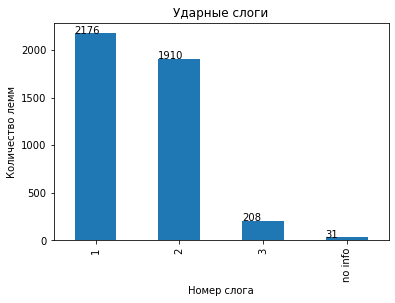

In [70]:
ax = new_final['stressed'].value_counts(sort=False).plot.bar()
plt.title('Ударные слоги')
plt.ylabel('Количество лемм')
plt.xlabel('Номер слога')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()))